## NLP Analysis on essays and need statements

#### NLP techniques including text classification, word frequency, and sentiment analysis were used to analyze the predictive values of "essays" and "need statements" (submitted by the teachers) on funding results. All the analysis were performed with 10% (113,828) of randomly selected data from the original database. Results can be found in the "Analysis Results" section at the end of this notebook.

###  1. Naive Bayes Text Classification

In [75]:
import pandas as pd
import numpy as np

In [76]:
# Import data csv file into dataframe
essays_data = pd.read_csv("essays_project_final_sample.csv", sep=",")

In [77]:
#Check for blank records
essays_data.isnull().sum()

_projectid           0
funding_status       0
title                0
short_description    0
need_statement       0
essay                0
dtype: int64

In [116]:
#create dataframe with "essay" column (features) and "funding_status" column (label)
essays_data_essay = essays_data[["funding_status", "essay"]]
essays_data_essay.shape

(113828, 2)

In [53]:
#tokenize "essay" column with spacy library
import spacy
nlp = spacy.load('en')

essays_data_essay['tokens'] = essays_data_essay['essay'].apply(lambda x: nlp.tokenizer(x))

In [54]:
#create dataframe with "tokens" column (features) and "funding_status" column (label)
essays_data_tokens = essays_data_essay[["funding_status", "tokens"]]
essays_data_tokens.head()

,funding_status,tokens
0,1,"(Our, classroom, is, a, fun, ,, safe, place, f..."
1,0,"(Was, your, primary, educational, experience, ..."
2,1,"(If, you, are, going, to, grow, a, garden, ,, ..."
3,1,"(My, students, are, amazing, !, , They, are, ..."
4,1,"(My, students, all, come, from, low, -, income..."


In [56]:
#Number of funded vs. not funded
count = essays_data_tokens["funding_status"].value_counts()
count


1    79472
0    34356
Name: funding_status, dtype: int64

In [154]:
#import spacy stopwords list
import spacy
nlp = spacy.load('en')
stops = nlp.Defaults.stop_words

In [59]:
#Remove stop words function
def normalize(comment, remove_stopwords):
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


In [60]:
#Remove stop words in tokens column
essays_data_tokens["cleaned_tokens"] = essays_data_tokens["tokens"].apply(normalize, remove_stopwords=True)

In [61]:
essays_data_tokens.head()

,funding_status,tokens,cleaned_tokens
0,1,"(Our, classroom, is, a, fun, ,, safe, place, f...","Our classroom fun , safe place child ! We lot ..."
1,0,"(Was, your, primary, educational, experience, ...",Was primary educational experience fill dull r...
2,1,"(If, you, are, going, to, grow, a, garden, ,, ...","If grow garden , find visit ! Our public schoo..."
3,1,"(My, students, are, amazing, !, , They, are, ...",My student amaze ! They push Art far limit gro...
4,1,"(My, students, all, come, from, low, -, income...","My student come low - income household , singl..."


In [62]:
#Split data into train and test using sklearn
from sklearn.model_selection import train_test_split

X = essays_data_tokens["cleaned_tokens"]
y = essays_data_tokens["funding_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [64]:
# Create TfidfVectorizer and Naïve Bayes pipeline:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),])

In [65]:
#Fit training data
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [66]:
#Predict using test data
predictions = text_clf_nb.predict(X_test)

[[    6 11379]
 [   12 26167]]


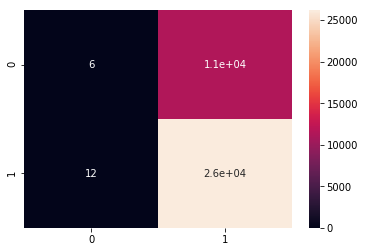

In [67]:
#Confusion Matrix
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm, annot=True)

In [68]:
#Classification Report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00     11385
           1       0.70      1.00      0.82     26179

   micro avg       0.70      0.70      0.70     37564
   macro avg       0.52      0.50      0.41     37564
weighted avg       0.59      0.70      0.57     37564



### 2. Linear SVC Text Classification

In [69]:
# Linear SVC:
from sklearn.svm import LinearSVC
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [70]:
#Fit training data
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [71]:
#Predict using test data
predictions = text_clf_lsvc.predict(X_test)

[[ 1765  9620]
 [ 2500 23679]]


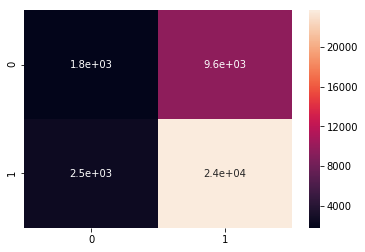

In [72]:
#LSVC Confusion Matrix
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)
sns.heatmap(cm, annot=True)

In [73]:
#LSVC Classification Report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.41      0.16      0.23     11385
           1       0.71      0.90      0.80     26179

   micro avg       0.68      0.68      0.68     37564
   macro avg       0.56      0.53      0.51     37564
weighted avg       0.62      0.68      0.62     37564



### 3. "Need Statements" Word Frequency Analysis

In [155]:
#Create need statement dataframe
essays_data_need = essays_data[["funding_status", "need_statement"]]
essays_data_need.shape

(113828, 2)

In [156]:
#tokenize "need statement" column with spacy library
import spacy
nlp = spacy.load('en')

essays_data_need['tokens'] = essays_data_need['need_statement'].apply(lambda x: nlp.tokenizer(x))

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [82]:
essays_data_need.head()

,funding_status,need_statement,tokens
0,1,"My students need 2 Giant Comfy Pillows, a Span...","(My, students, need, 2, Giant, Comfy, Pillows,..."
1,0,My students need tablets that remain in the cl...,"(My, students, need, tablets, that, remain, in..."
2,1,My students need 1 digital microscope to ident...,"(My, students, need, 1, digital, microscope, t..."
3,1,"My students need paint, brushes, colored penci...","(My, students, need, paint, ,, brushes, ,, col..."
4,1,My students need a copy of Maniac Magee and Ho...,"(My, students, need, a, copy, of, Maniac, Mage..."


In [83]:
essays_data_needtok = essays_data_need[["funding_status", "tokens"]]
essays_data_needtok.head()

,funding_status,tokens
0,1,"(My, students, need, 2, Giant, Comfy, Pillows,..."
1,0,"(My, students, need, tablets, that, remain, in..."
2,1,"(My, students, need, 1, digital, microscope, t..."
3,1,"(My, students, need, paint, ,, brushes, ,, col..."
4,1,"(My, students, need, a, copy, of, Maniac, Mage..."


In [89]:
#Separate data by funding status: create dataframes for funded and not funded records

funded_df = essays_data_needtok.drop(essays_data_needtok.loc[essays_data_needtok['funding_status']==0].index)     
not_funded_df = essays_data_needtok.drop(essays_data_needtok.loc[essays_data_needtok['funding_status']==1].index)    
nfcount = not_funded_df["funding_status"].value_counts()
fcount = funded_df["funding_status"].value_counts()
print(f"Total funded {fcount}      Total Not funded {nfcount}")

Total funded 1    79472
Name: funding_status, dtype: int64      Total Not funded 0    34356
Name: funding_status, dtype: int64


In [106]:
#Split and count need statements words in funded dataframe
funded_string = funded_df["tokens"].to_string(header=False, index=False)
from collections import Counter

funded_list = Counter(funded_string.split()).most_common()
funded_list_df = pd.DataFrame(funded_list, columns=['Funded_List', 'Funded_Count'])

In [107]:
#Top 500 words in funded dataframe
funded_list_df = funded_list_df[:500]

In [108]:
#Split and count need statements words in not funded dataframe
not_funded_string = not_funded_df["tokens"].to_string(header=False, index=False)
from collections import Counter

not_funded_list = Counter(not_funded_string.split()).most_common()
not_funded_list_df = pd.DataFrame(not_funded_list, columns=['Not_Funded_List', 'Not_Funded_Count'])

In [109]:
#Top 500 words in not funded dataframe
not_funded_list_df = not_funded_list_df[:500]
not_funded_list_df.shape

(500, 2)

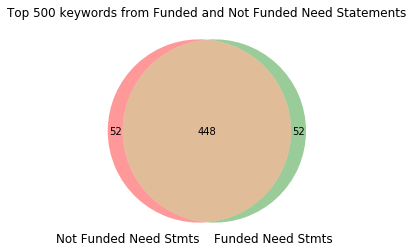

In [110]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

venn2([set(not_funded_list_df['Not_Funded_List']), set(funded_list_df['Funded_List'])], ("Not Funded Need Stmts", "Funded Need Stmts"))
plt.title("Top 500 keywords from Funded and Not Funded Need Statements")
plt.show()

### 4. NLTK Sentiment Analysis

In [111]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [117]:
essays_data_essay.head()

,funding_status,essay
0,1,"Our classroom is a fun, safe place for childre..."
1,0,Was your primary educational experience filled...
2,1,"If you are going to grow a garden, you better ..."
3,1,My students are amazing! They are pushing the...
4,1,My students all come from low-income household...


In [118]:
essays_data_essay['scores'] = essays_data_essay['essay'].apply(lambda review: sid.polarity_scores(review))
essays_data_essay['compound']  = essays_data_essay['scores'].apply(lambda score_dict: score_dict['compound'])

essays_data_essay['comp_score'] = essays_data_essay['compound'].apply(lambda c: 1 if c >=0 else 0)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [119]:
essays_data_essay.head()

,funding_status,essay,scores,compound,comp_score
0,1,"Our classroom is a fun, safe place for childre...","{'neg': 0.019, 'neu': 0.844, 'pos': 0.138, 'co...",0.9758,1
1,0,Was your primary educational experience filled...,"{'neg': 0.015, 'neu': 0.924, 'pos': 0.06, 'com...",0.9013,1
2,1,"If you are going to grow a garden, you better ...","{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.9753,1
3,1,My students are amazing! They are pushing the...,"{'neg': 0.023, 'neu': 0.81, 'pos': 0.167, 'com...",0.9949,1
4,1,My students all come from low-income household...,"{'neg': 0.086, 'neu': 0.756, 'pos': 0.158, 'co...",0.9231,1


In [120]:
essays_data_essay.to_csv("essays_data_essay", header=True, index=False)

In [122]:
mean_sent_score = essays_data_essay.groupby("funding_status")["compound"].mean()
mean_sent_score

funding_status
0    0.954627
1    0.953735
Name: compound, dtype: float64

In [150]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [151]:
accuracy_score(essays_data_essay['funding_status'],essays_data_essay['comp_score'])

0.6935815440840567

In [152]:
print(classification_report(essays_data_essay['funding_status'],essays_data_essay['comp_score']))

              precision    recall  f1-score   support

           0       0.28      0.01      0.02     34356
           1       0.70      0.99      0.82     79472

   micro avg       0.69      0.69      0.69    113828
   macro avg       0.49      0.50      0.42    113828
weighted avg       0.57      0.69      0.58    113828



[[  322 34034]
 [  845 78627]]


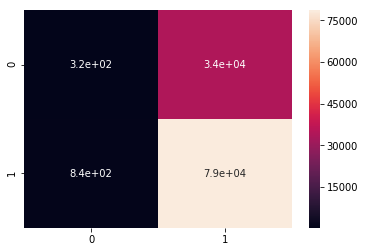

In [153]:
cm = confusion_matrix(essays_data_essay['funding_status'],essays_data_essay['comp_score'])
print(cm)
sns.heatmap(cm, annot=True)

## Analysis Results:

#### Both Naïve Bayes and Linear SVC Text Classification test results showed low F1 scores with high “false positives”. Naïve Bayes weighted average F1 score was 0.57 while Linear SVC was 0.62. Based on these test results, it is determined that ‘essays’ are not a good predictor of whether project requests will be funded. 

#### Keywords from need statements for funded and not funded projects were compared to explore their impact on funding results. Of the 500 most used words in both funded and not funded projects’ need statements, an overwhelming 448 or 90% words were shared by both lists. Therefore, need statements are also not a good predictor of whether project requests will be funded. 

#### Sentiment analysis were performed on essays for all projects. Both funded and not funded projects averaged a highly positive sentiment compound score of 0.95, which indicates that most of the essays have a positive tone, and sentiment compound score is again not a good predictor of whether project requests will be funded.

#### In conclusion, all NLP analysis results are conclusive that data from written statements have no predictive value of funding success. 

